In [2]:
%%writefile C:/Users/alifa/OneDrive/Documents/Bigdata//StreamsTweet_app.py
#Import the necessary methods from tweepy library
from tweepy.streaming import StreamListener
from tweepy.auth import OAuthHandler
from tweepy import Stream

#Variables that contains the user credentials to access Twitter API 
access_token = "2261482722-PMBgA0HwYWyp3u4DArihMe8dZ80U1gANlLE5sqZ"
access_token_secret = "Ta1oaaSKzb9fNtgzVxwHyZWvmsMypSefaUv11fKZDsWdh"
consumer_key = "6kfpQ4WnZJVGUO4sr0sCbVnzw"
consumer_secret = "eYVqcpObN3AlhdhBM5uGTiGkMvPJBMzcAk4A3lKgdJT7EVDMCH"

# This is a basic listener that just prints received tweets to stdout.
class StdOutListener(StreamListener):
    def on_data(self, data):
        
        #file=open("TweetOut.txt","a")
        #file.write(data)
        print(data)
        return True

    def on_error(self, status):
        print (status)


if __name__ == '__main__':
    # This handles Twitter authetification and the connection to Twitter Streaming API
    l = StdOutListener()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    stream = Stream(auth, l)

    # This line filter Twitter Streams to capture data by the keywords: 'python', 'javascript', 'ruby'

    stream.filter(track=['Big Data', 'IoT','Cloud'])

Writing C:/Users/alifa/OneDrive/Documents/Bigdata//StreamsTweet_app.py


In [1]:
pwd 

u'C:\\Users\\alifa\\OneDrive\\Documents\\Bigdata\\Streams'

In [ ]:
%%cmd
python C:/Users/alifa/OneDrive/Documents/Bigdata/StreamsTweet_app.py> C:/Users/alifa/OneDrive/Documents/Bigdata/Streams/Tweet_Out.txt

In [1]:
import json
import pandas as pd
t_list = []
t_file = open("Tweet_Out.txt", "r")
for line in t_file:
    try:
        tweet = json.loads(line)
        t_list.append(tweet)
    except:
        continue
print len(t_list)
tweets = pd.DataFrame()
tweets['text'] = map(lambda tweet: tweet['text'], t_list)
tweets['lang'] = map(lambda tweet: tweet['lang'], t_list)
tweets['time_zone'] = map(lambda tweet: tweet['user']['time_zone'], t_list)
tweets.head(5)

350


,text,lang,time_zone
0,Date and time is: Sun Dec 16 22:30:03 EST 2018...,en,None
1,You may be interested in this job =&gt; IoT Ar...,en,None
2,Understand &amp; #exploit the underlying #circ...,en,None
3,RT @FakeWIPCaller: That Foles word cloud thing...,en,None
4,RT @gp_pulipaka: Engineering Uber Predictions ...,en,None


In [2]:
tweet_text=tweets.loc[tweets['lang']=='en','text']
t_text_without_urls = tweet_text.str.replace('http\S+|www.\S', ' ', case=False)#removing URLs in tweet_text
cleand_tweets=t_text_without_urls.str.replace('@[A-Za-z0-9]|[^0-9A-Za-z \t]|RT+.*|[^A-Za-z]',' ', case=False)#removing special characters
cleand_tweets.str.split(' ', expand=True).stack().unique()
cleand_tweets.str.split(' ', expand=True).stack().value_counts().head(10)

         1782
a          46
cloud      44
the        44
to         28
of         27
I          25
and        25
on         25
has        23
dtype: int64

In [5]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [7]:
import nltk
from nltk.corpus import stopwords
import numpy as np

#eliminates stop word
s = stopwords.words('english')

No_stopwords=cleand_tweets.apply(lambda x: ' '.join([word for word in x.split() if word not in (s)]))
cleaned_without_stopwords=No_stopwords.str.split(' ', expand=True).stack().unique()
No_stopwords.str.split(' ', expand=True).stack().value_counts()
print cleaned_without_stopwords

np.savetxt(r'english/test.txt', cleaned_without_stopwords, fmt='%s')

[u'Date' u'time' u'Sun' u'Dec' u'EST' u'current' u'memory' u'usage' u'M'
 u'Powered' u'RaspberryPi' u'Maker' u'IoT' u'You' u'may' u'interested'
 u'job' u'gt' u'Architect' u'bigdata' u'iot' u'analytics' u'ai'
 u'Understand' u'amp' u'exploit' u'underlying' u'circuit' u'components'
 u'device' u'learn' u'UA' '' u'Applications' u'Data' u'Science' u'A'
 u'Enterprise' u'View' u'Internet' u'Of' u'Things' u'Infographic' u'isher'
 u'via' u'ntgrasso' u'DbiSrl' u'IIoT' u'AI' u'innovation' u'Temp' u'C'
 u'Steady' u'RH' u'Wind' u'WNW' u'km' u'h' u'F' u'BP' u'hpa' u'Falling'
 u'Rain' u'day' u'mm' u'Cloud' u'Base' u'Hi' u'Lo' u'Coinbase' u'Revamps'
 u'PayPal' u'Withdrawals' u'US' u'Crypto' u'Users' u'oinDesk'
 u'Blockchain' u'HyperX' u'Revolver' u'S' u'Headset' u'Hyper' u'Current'
 u'Temperature' u'Pressure' u'hPa' u'Humidity' u'HongKong' u'SenseHAT'
 u'driven' u'fantastic' u'productivity' u'growth' u'much' u'come' u'In'
 u'year' u'G' u'received' u'estimated' u'million' u'investment'
 u'multiple' u'ro

In [9]:
#creates other dataset but with same keywords
import json
import pandas as pd
from nltk.corpus import stopwords
import numpy as np

t_list = []
t_file = open("Tweet_Out1.txt", "r")
for line in t_file:
    try:
        tweet = json.loads(line)
        t_list.append(tweet)
    except:
        continue
        
tweets = pd.DataFrame()
tweets['text'] = map(lambda tweet: tweet['text'], t_list)
tweets['lang'] = map(lambda tweet: tweet['lang'], t_list)
tweets['time_zone'] = map(lambda tweet: tweet['user']['time_zone'], t_list)
tweets.head(5)

tweet_text=tweets.loc[tweets['lang']=='en','text']
t_text_without_urls = tweet_text.str.replace('http\S+|www.\S', ' ', case=False)
cleand_tweets=t_text_without_urls.str.replace('@[A-Za-z0-9]|[^0-9A-Za-z \t]|RT+.*|[^A-Za-z]',' ', case=False)
cleand_tweets.str.split(' ', expand=True).stack().unique()
cleand_tweets.str.split(' ', expand=True).stack().value_counts().head(10)

stop = stopwords.words('english')
No_stopwords=cleand_tweets.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
cleaned_without_stopwords_1=No_stopwords.str.split(' ', expand=True).stack().unique()
No_stopwords.str.split(' ', expand=True).stack().value_counts()

np.savetxt(r'english/test1.txt', cleaned_without_stopwords_1, fmt='%s')

6.2 Create a bloom filter classifying two days worth of  the streams ( after removing stop words and urls  ) 

In [10]:
from pybloom import BloomFilter
import os
import re

a = {i: open('English/' + i).read() for i in os.listdir('English/')}
b = {i: set(re.split("\W+", j.lower())) for i, j in a.items()}
d = {}
for i,j in b.items():
    print i,j
    d[i] = BloomFilter(capacity=len(j), error_rate=0.1)
    for j in j:
        d[i].add(j)

test1.txt set(['', 'yellow', 'hate', 'forget', 'tweet', 'umass', 'lord', 'pact', 'updated', 'rescue', 'every', 'updates', 'stabbed', 'screaming', 'companies', 'humidity', 'vivobook', 'force', 'second', 'estimated', 'even', 'revolver', 'lights', 'ogthecat', 'new', 'ummerdru', 'kicked', 'men', 'bhubaneshwar', 'bangkok', 'aptmorganray', 'yuchan', 'kids', 'k', 'credit', 'smoke', 'browsing', 'adopting', 'golden', 'fantastic', 'spooky', 'ftcommenter', 'total', 'would', 'army', 'sweater', 'music', 'infosec', 'award', 'berlin', 'me', 'word', 'room', 'mm', 'ml', 'work', 'mi', 'solitaire', 'containment', 'my', 'example', 'give', 'household', 'dolphin', 'seamaster', 'want', 'goff', 'weetcloudbot', 'turn', 'provide', 'song', 'machine', 'how', 'hot', 'toxic', 'symposium', 'beach', 'charging', 'gaming', 'dxcentral', 'mest', 'wrong', 'curiosity', 'ove', 'schneider', 'green', 'alvado', 'sucessor', 'vapor', 'squint', 'interpretation', 'office', 'arminconnect', 'plated', 'ima', 'highlights', 'fix', 'soc

In [12]:
! pip install dynamic_pybloom

  Running setup.py bdist_wheel for dynamic-pybloom: started
  Running setup.py bdist_wheel for dynamic-pybloom: finished with status 'done'
  Stored in directory: C:\Users\alifa\AppData\Local\pip\Cache\wheels\6c\06\76\8cd440f60cdb93022908c75296e29b37edcf39e0dd7dd41ed2
Successfully built dynamic-pybloom


6.3 For another days worth of twitter data find the previous twitters that match in the bloom filter (This means get two days of data in one file or directory , use that data for training the bloom filter, capture a different days data in a different file ( or do it in real time)and capture the match output then running the new twitter data through the filter.

In [13]:
from dynamic_pybloom import ScalableBloomFilter
obj = ScalableBloomFilter(mode=ScalableBloomFilter.SMALL_SET_GROWTH)

for word in cleaned_without_stopwords:
    obj.add(word)
len(obj)
m= 0
mm = 0
for i in cleaned_without_stopwords_1:#compares both datasets but with same keywords
    if i in obj:
        m += 1
    else:
        mm += 1
    
print(m)
print(mm)

895
658



6.4 Plot a historgram of matches for each twitter in 5.3

[Text(0,0,'Match'), Text(0,0,'mismatch')]

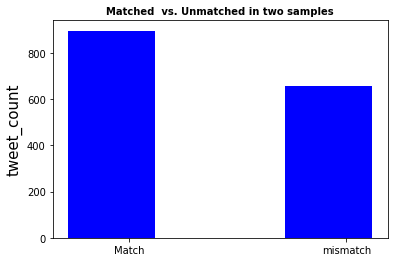

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
x_pos = list(range(2))
y_pos = [m,mm]
width = 0.4
fig, ax = plt.subplots()
plt.bar(x_pos, y_pos, width, alpha=1, color='b')

# Setting axis labels and ticks
ax.set_ylabel('tweet_count', fontsize=15)
ax.set_title('Matched  vs. Unmatched in two samples', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.2 * width for p in x_pos])
ax.set_xticklabels(['Match', 'mismatch'])
#plt.grid()
#Matches are more because, I took two twitter datasets with same keywords. The second one is a smaller dataset.

## References

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

https://pypi.python.org/pypi/pybloom/1.0.2

http://nullege.com/codes/search/pybloom.ScalableBloomFilter

https://axiak.github.io/pybloomfiltermmap/

https://pypi.python.org/pypi/pybloomfiltermmap

http://www.geeksforgeeks.org/removing-stop-words-nltk-python/

https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python